# Mosquito Breeding Sites - Selective Search

0.877546072006 seconds
7


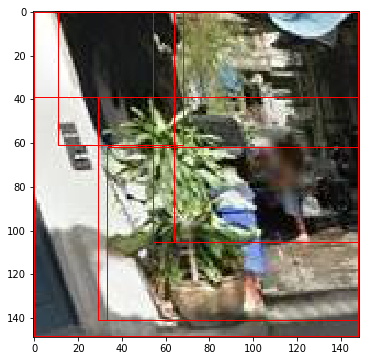

44.1660690308 seconds
26


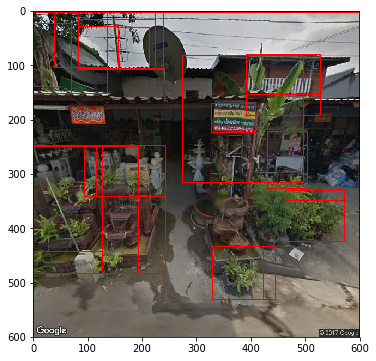

53.447781086 seconds
20


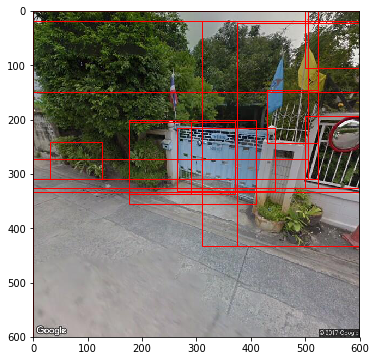

67.9090509415 seconds
22


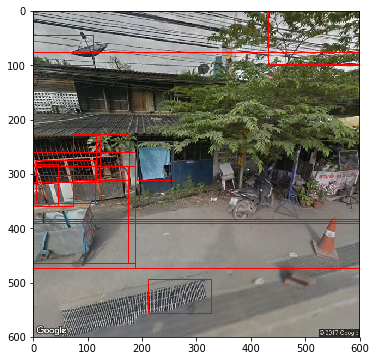

52.2453010082 seconds
13


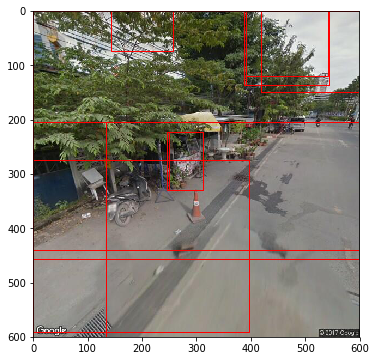

59.3781580925 seconds
38


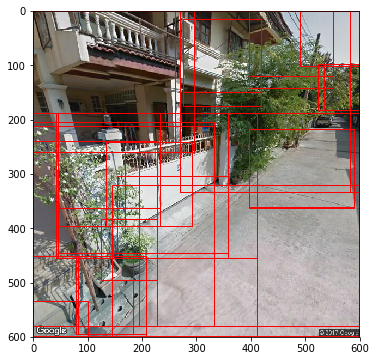

40.9063749313 seconds
10


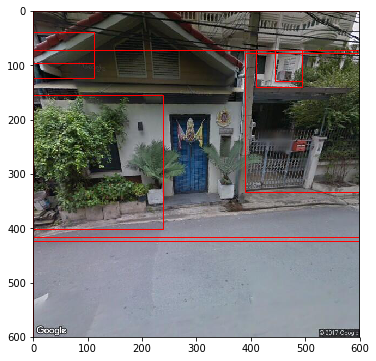

47.2210199833 seconds
9


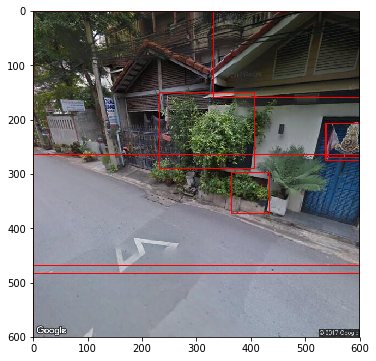

14.4937000275 seconds
27


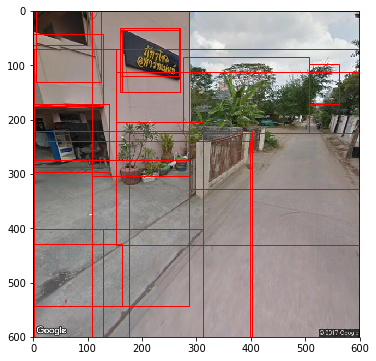

65.8322210312 seconds
18


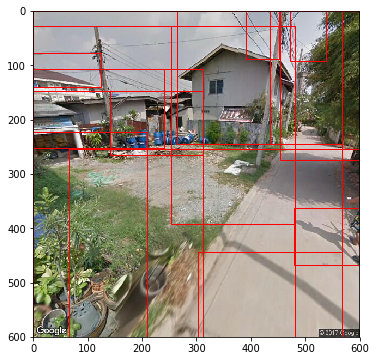

43.0597169399 seconds
35


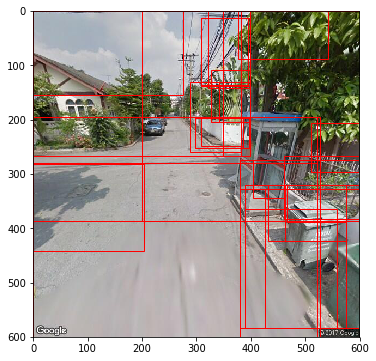

73.9942159653 seconds
35


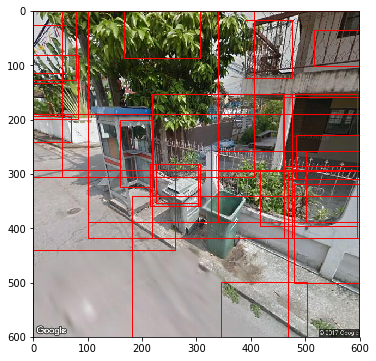

In [2]:
%matplotlib inline
import skimage.data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import selectivesearch
import time

def main(path):
    start = time.time()
    # loading astronaut image
    img = mpimg.imread(path)

    # perform selective search
    img_lbl, regions = selectivesearch.selective_search(
        img, scale=1000, sigma=0.5, min_size=5)

    candidates = set()
    for r in regions:
        # excluding same rectangle (with different segments)
        if r['rect'] in candidates:
            continue
        # excluding regions smaller than 2000 pixels
        if r['size'] < 2000:
            continue
        # distorted rects
        x, y, w, h = r['rect']
        if w / h > 1.0 or h / w > 1.0:
            continue
        candidates.add(r['rect'])
        
    print time.time()-start,'seconds'
    print len(candidates)
    
    # draw rectangles on the original image
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
    ax.imshow(img)
    for x, y, w, h in candidates:
       # print x, y, w, h
        rect = mpatches.Rectangle(
            (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)
    plt.show()

if __name__ == "__main__":
    main('/home/poom/darknet/google-map_13,7400298_100,5136741_135_5.jpg')
    main('/home/poom/darknet/google-map_13,7981575_100,5449605_180.jpg')
    main('/home/poom/Jupyter notebook/Inception/google-map_13,8251575_100,5549605_45.jpg')
    main('/home/poom/Jupyter notebook/Inception/google-map_13,8211575_100,5559605_45.jpg')
    main('/home/poom/Jupyter notebook/Inception/google-map_13,8211575_100,5559605_90.jpg')
    main('/home/poom/Jupyter notebook/Inception/google-map_13,8211575_100,5599605_45.jpg')
    main('/home/poom/darknet/google-map_13,8251575_100,5589605_90.jpg')
    main('/home/poom/darknet/google-map_13,8251575_100,5589605_45.jpg')
    main('/home/poom/darknet/google-map_13,8251575_100,5519605_45.jpg')
    main('/home/poom/darknet/google-map_13,8251575_100,5479605_45.jpg')
    main('/home/poom/darknet/x2/google-map_13,8261575_100,5469605_0.jpg')
    main('/home/poom/darknet/x2/google-map_13,8261575_100,5469605_45.jpg')